# Libraries

In [12]:
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
train_file_id = '1PLiSTLDD9Z31f6qA_PgSc6d5_G02sSA7'
train_output_file = 'Dataset/sleep_disorder_classification_eda.csv'

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=1PLiSTLDD9Z31f6qA_PgSc6d5_G02sSA7
To: c:\Users\firma\Documents\Python\Bangkit\Sleep Disorder Classification\Dataset\sleep_disorder_classification_eda.csv
100%|██████████| 21.5k/21.5k [00:00<00:00, 500kB/s]


# EDA

## Histplot

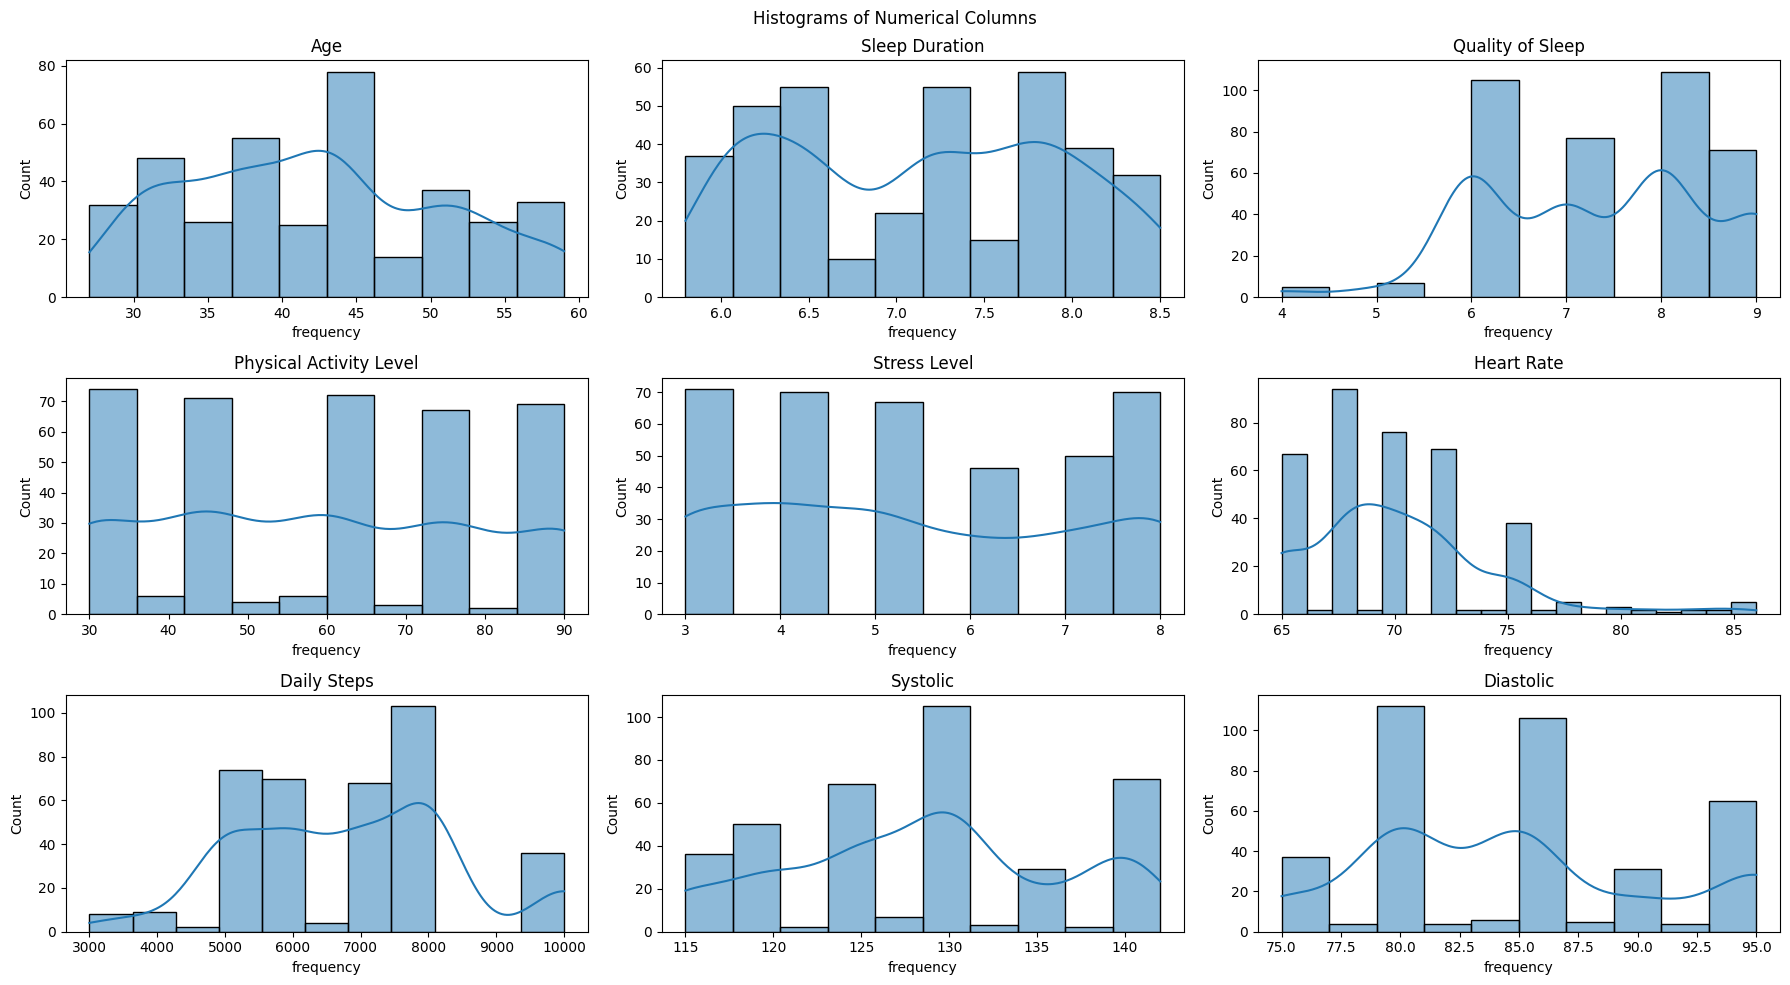

In [17]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['Unnamed: 0']]
fig, axes = plt.subplots(3,3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = sns.histplot(x = df[col], ax = axes[i], kde = True)
    ax.set_title(col)
    ax.set_xlabel('frequency')

plt.suptitle("Histograms of Numerical Columns")
plt.tight_layout()
plt.show()

## Boxplot

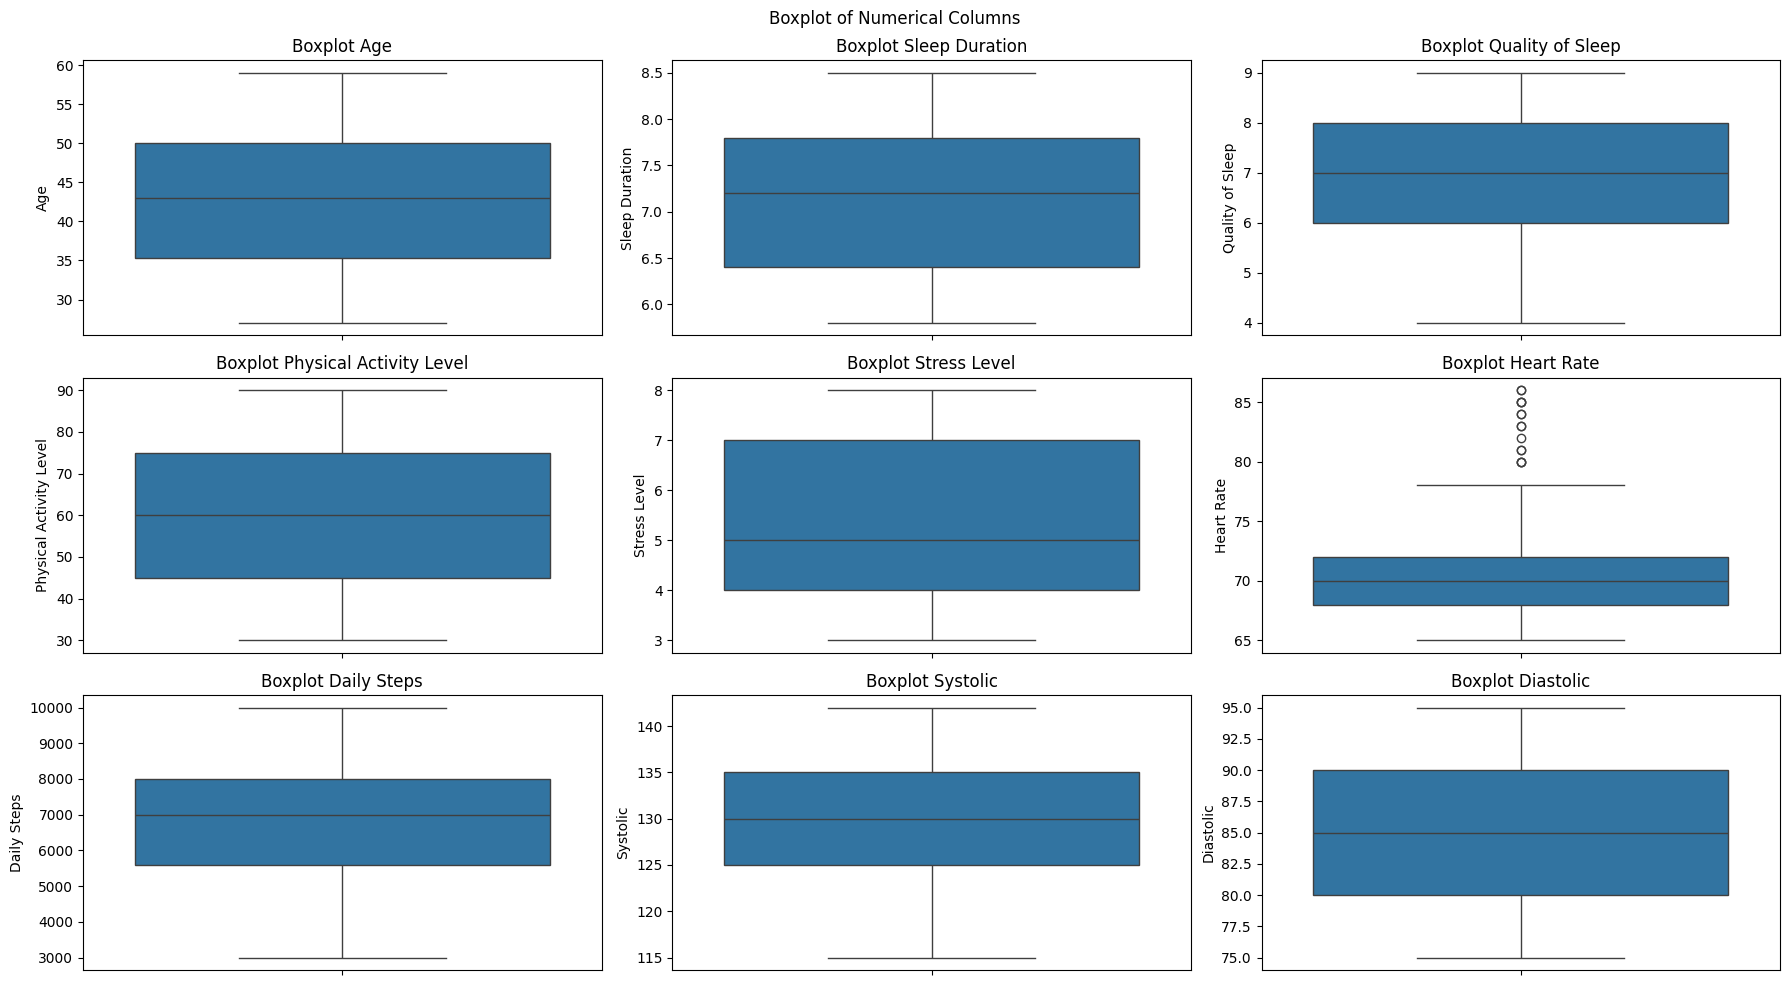

In [18]:
fig, axes = plt.subplots(3,3, figsize=(18,10))
axes = axes.flatten()

for i, var in enumerate(columns):
  sns.boxplot(y=df[var], ax=axes[i])
  axes[i].set_title(f'Boxplot {var}')
  axes[i].set_ylabel(var)

plt.suptitle("Boxplot of Numerical Columns")
plt.tight_layout()
plt.show()

## Pie Chart and Countplot Chart

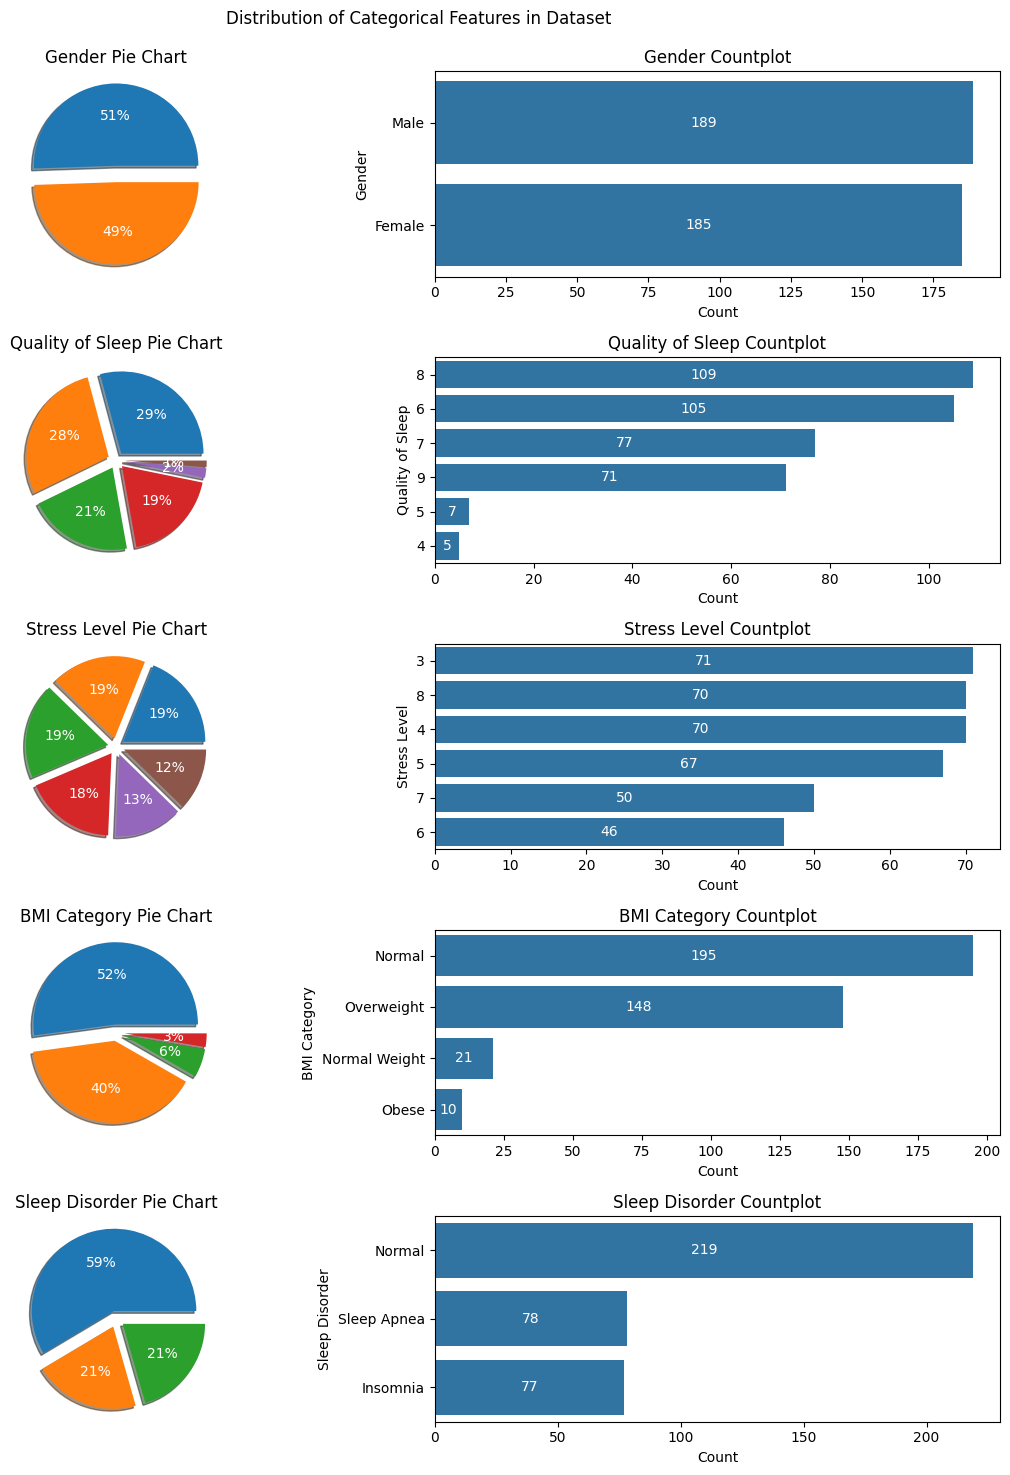

In [11]:
obj = [col for col in df.columns if df[col].nunique() < 10]

fig, axes = plt.subplots(len(obj), 2, figsize=(12, 3 * len(obj)))

for i, column in enumerate(obj):
  ax = axes[i, 0]
  ax.pie(
      df[column].value_counts(),
      shadow=True,
      explode=[0.1 for _ in range(df[column].nunique())],
      autopct='%1.f%%',
      textprops={'color': 'white'}
    )
  ax.set_aspect('equal')
  ax.set_title(f'{column} Pie Chart')

  ax1 = axes[i, 1]
  sns.countplot(y=column, ax=ax1, order=df[column].value_counts().index, data=df)
  ax1.set_xlabel('Count')
  ax1.set_ylabel(column)
  ax1.set_title(f'{column} Countplot')

  total = len(df[column])
  for p in ax1.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax1.text(x, y, f'{int(p.get_width())}', ha='center', va='center', color='white')

fig.suptitle('Distribution of Categorical Features in Dataset\n')
plt.tight_layout()
plt.show()

### Countplot by Gender

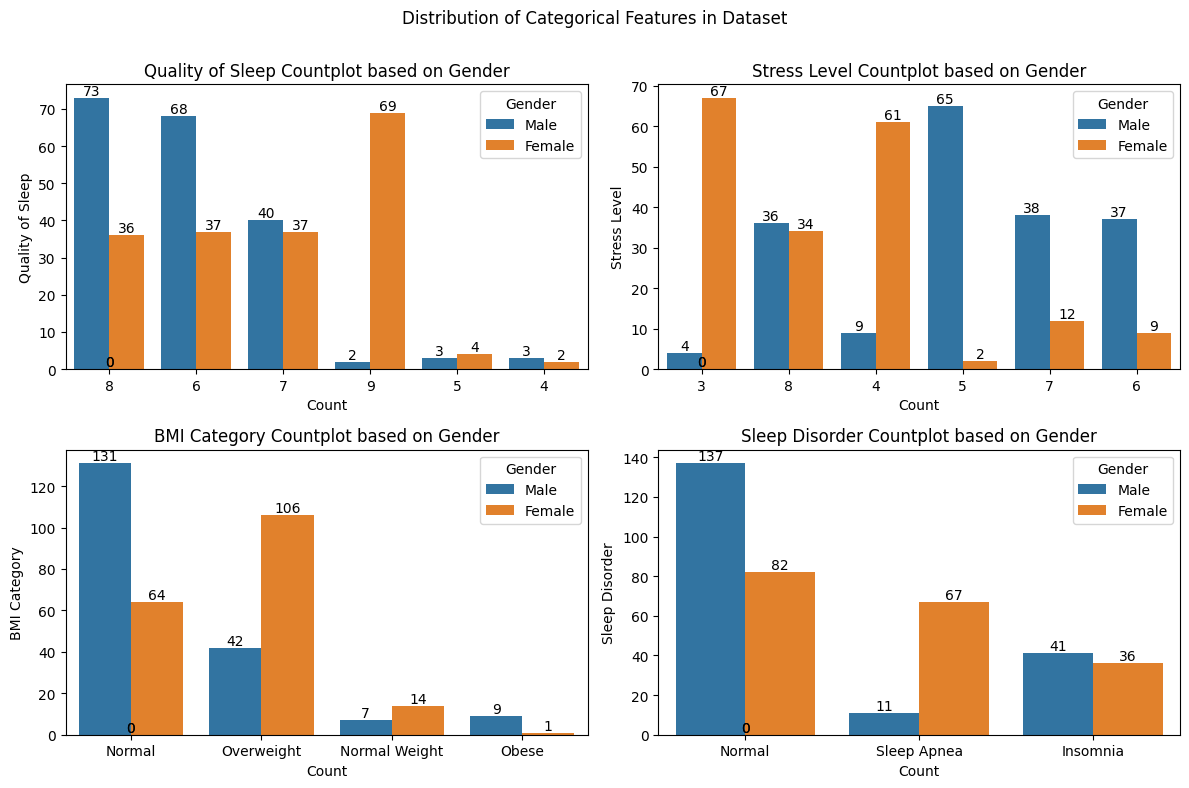

In [16]:
columns = [col for col in df.columns if df[col].nunique() < 10 and col not in ['Gender']]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(columns):
  ax = sns.countplot(x=col, order=df[col].value_counts().index, data=df, ax=axes[i], hue='Gender')
  ax.set_xlabel('Count')
  ax.set_ylabel(col)
  ax.set_title(f'{col} Countplot based on Gender')

  for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{int(p.get_height())}', ha='center', va='bottom', color='black')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Distribution of Categorical Features in Dataset\n')
plt.tight_layout()
plt.show()

### By sleep disorder

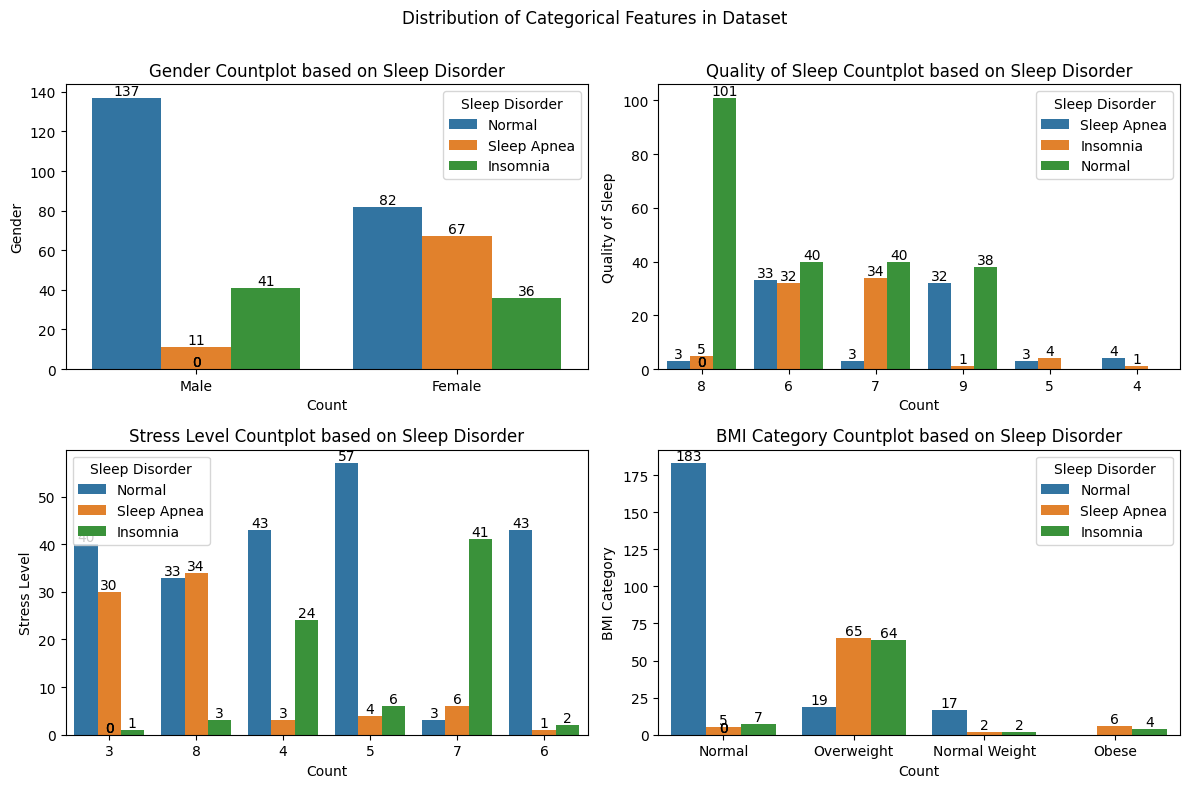

In [19]:
columns = [col for col in df.columns if df[col].nunique() < 10 and col not in ['Sleep Disorder']]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(columns):
  ax = sns.countplot(x=col, order=df[col].value_counts().index, data=df, ax=axes[i], hue='Sleep Disorder')
  ax.set_xlabel('Count')
  ax.set_ylabel(col)
  ax.set_title(f'{col} Countplot based on Sleep Disorder')

  for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{int(p.get_height())}', ha='center', va='bottom', color='black')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Distribution of Categorical Features in Dataset\n')
plt.tight_layout()
plt.show()

## Correlation Matrix

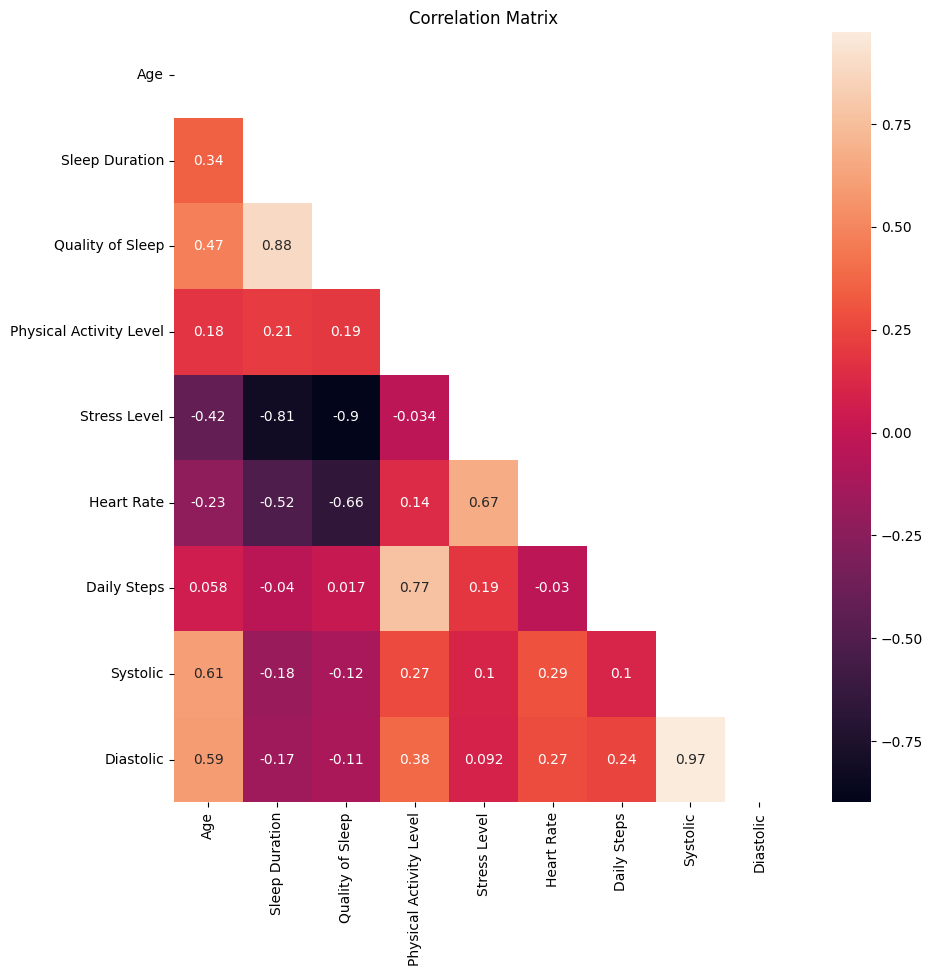

In [14]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col not in ['Unnamed: 0']]

corr = df[columns].corr()
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()